In [1]:
import numpy as np
import pandas as pd

np.random.seed(1234)
d1 = pd.Series(2*np.random.normal(size = 100)+3)
d2 = np.random.f(2,4,size = 100)
d3 = np.random.randint(1,100,size = 100)

In [2]:
d1.count()          #非空元素计算
d1.min()            #最小值
d1.max()            #最大值
d1.idxmin()         #最小值的位置，类似于R中的which.min函数
d1.idxmax()         #最大值的位置，类似于R中的which.max函数
d1.quantile(0.1)    #10%分位数
d1.sum()            #求和
d1.mean()           #均值
d1.median()         #中位数
d1.mode()           #众数
d1.var()            #方差
d1.std()            #标准差
d1.mad()            #平均绝对偏差
d1.skew()           #偏度
d1.kurt()           #峰度
d1.describe()       #一次性输出多个描述性统计指标

count    100.000000
mean       3.070225
std        2.001402
min       -4.127033
25%        2.040101
50%        3.204555
75%        4.434788
max        7.781921
dtype: float64

必须注意的是，descirbe方法只能针对序列或数据框，一维数组是没有这个方法的

In [3]:
# 自定义一个函数，将这些统计指标汇总在一起：

def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
                      x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['总数','最小值','最小值位置','25%分位数',
                    '中位数','75%分位数','均值','最大值','最大值位数','平均绝对偏差','方差','标准差','偏度','峰度'])
df = pd.DataFrame(status(d1))
df

,0
总数,100.000000
最小值,-4.127033
最小值位置,81.000000
25%分位数,2.040101
中位数,3.204555
75%分位数,4.434788
均值,3.070225
最大值,7.781921
最大值位数,39.000000
平均绝对偏差,1.511288


在实际的工作中，我们可能需要处理的是一系列的数值型数据框，如何将这个函数应用到数据框中的每一列呢？可以使用apply函数，这个非常类似于R中的apply的应用方法。 
将之前创建的d1,d2,d3数据构建数据框：

In [4]:
df = pd.DataFrame(np.array([d1,d2,d3]).T, columns=['x1','x2','x3'])
df.head()

df.apply(status)

,x1,x2,x3
总数,100.000000,100.000000,100.000000
最小值,-4.127033,0.014330,3.000000
最小值位置,81.000000,72.000000,76.000000
25%分位数,2.040101,0.249580,25.000000
中位数,3.204555,1.000613,54.500000
75%分位数,4.434788,2.101581,73.000000
均值,3.070225,2.028608,51.490000
最大值,7.781921,18.791565,98.000000
最大值位数,39.000000,53.000000,96.000000
平均绝对偏差,1.511288,1.922669,24.010800


In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

注：使用pandas创建一个Series（序列），序列值是随机生成的1000个标准正态分布值，索引是从2000-1-1开始的1000个时间序列值



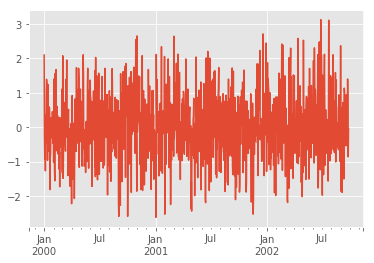

In [6]:
import pandas as pd
import numpy as np
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.plot()

可以看出，这个图非常不规则，因为相邻的两个值也是随机大小
这里加上了ts = ts.cumsum()，意思是返回累积值，在时间序列分析中，经常观察累积值曲线观察走势.

是不是这个累积值看起来规则多了呢?

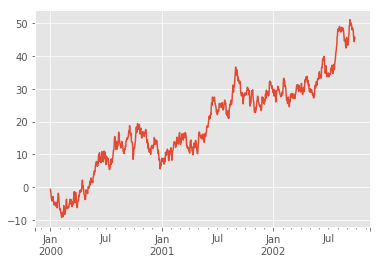

In [7]:
import pandas as pd
import numpy as np
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

使用pandas创建了一个DataFrame（数据框，有点像excel表格那种），为什么不用刚才的Series呢？

划重点啦！因为这里DataFrame中创建了4组数据

这4组数据都是随机生成的1000个标准正态分布值

索引是从2000-1-1开始的1000个时间序列值

并且也是求他们各自的累积值并且画图

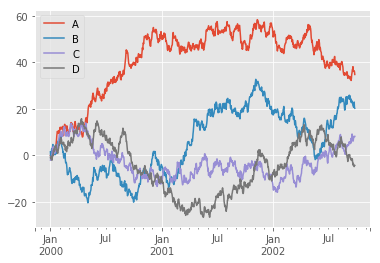

In [8]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.plot()

In [9]:
list(range(len('xyz')))

[0, 1, 2]

使用DataFrame创建了2组数据，也是1000个标准正态分布，分别命名为B、C（就行excel中列名）

并且求累积值

再在原来的df（DataFrame的简称）(这里名字是df3）上加上一列名为A

A的值是0-999（使用df3的长度为1000，然后range被套列表生成一列数，作为x轴），y轴是B列数据（累积值），c列数据最后绘图没有用上

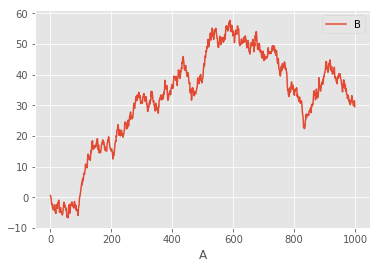

In [10]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

In [12]:
# 条形图
# 对于标记的非时间序列数据，你可能希望生成条形图：

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')#使用ggplot样式
%matplotlib inline

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df

,A,B,C,D
2000-01-01,-1.974207,-0.671157,-0.709526,0.873632
2000-01-02,-0.941348,0.256741,1.044619,0.685581
2000-01-03,-1.180258,0.477377,0.809862,0.335963
2000-01-04,-0.680418,-0.196442,0.790442,-1.581054
2000-01-05,-3.890949,1.495107,1.687386,-1.531064
2000-01-06,-3.550266,2.400415,3.306413,-1.182988
2000-01-07,-4.017105,0.983606,4.570592,-1.823247
2000-01-08,-6.408867,0.206634,4.215379,-2.965966
2000-01-09,-7.164463,-0.676156,3.485211,-3.684008
2000-01-10,-6.286498,0.347984,4.740890,-4.402415


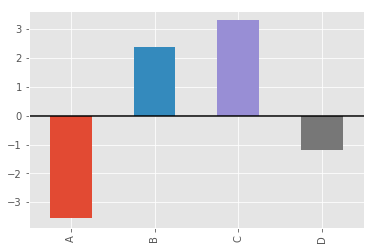

In [13]:
plt.figure();
df.iloc[5].plot(kind='bar')
plt.axhline(0, color='k')

# 注：df.iloc[5]意思是取出df第6行（索引为5），然后绘制条形图
# plt.axhline(0, color='k')指的是在y=0的位置画一条黑色的线

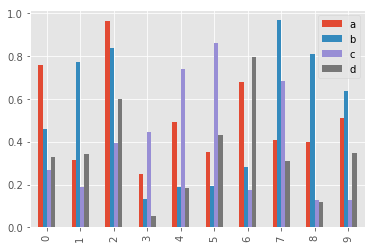

In [14]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar()
# 同一幅图绘制多个条形图比较

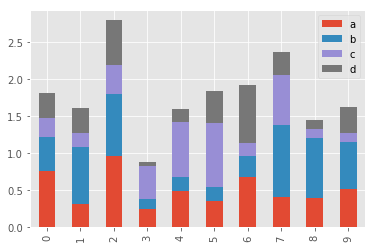

In [15]:
df2.plot.bar(stacked=True)
# 注：将a、b、c、d数据叠加起来绘制条形图

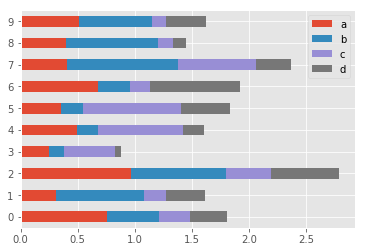

In [16]:
df2.plot.barh(stacked=True)
# 注：绘制水平叠加条形图

## 直方图


In [17]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
df4.head()

# 注：以标准正态分布为基础产生一个df4

,a,b,c
0,0.315527,0.152397,-2.177642
1,0.504475,0.929167,-0.718356
2,0.419294,-0.879575,-0.894870
3,-0.626081,-1.536683,-1.008666
4,2.106907,0.178452,-0.659536


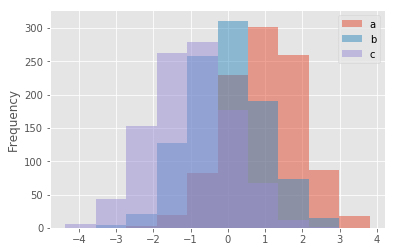

In [19]:
plt.figure()
df4.plot.hist(alpha=0.5)
# 注：绘制直方图，alpha=0.5意思为透明度为50%
# 注：明明有三列数据，画出有六种颜色，应该是是颜色叠加出了新颜色

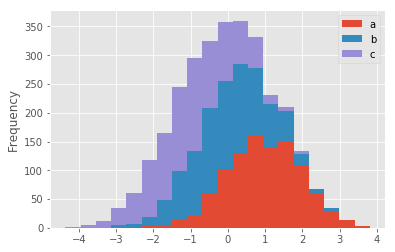

In [20]:
plt.figure()
df4.plot.hist(stacked=True, bins=20)
# 注：画堆积直方图（不会重叠，直观）bins=20指的是分为20个区段
# 图中没有显示20个因为正态分布距离中心远处取值可能心很小，
# 可能只有个别值，在图中不明显

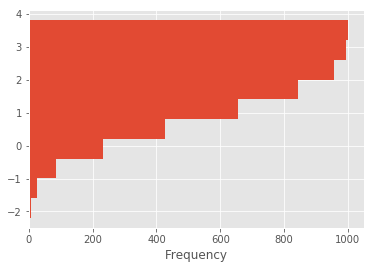

In [21]:
plt.figure();
df4['a'].plot.hist(orientation='horizontal', cumulative=True)
# 注：取出A列画横向累积直方图，采用默认10个区段

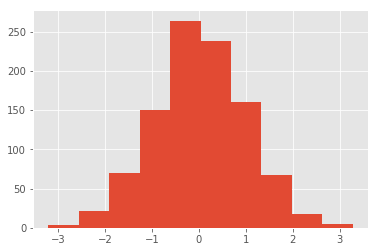

In [22]:
plt.figure()
df['A'].diff().hist()
# 注：diff为差分，即后一个减去前一个,我们看一下：

In [23]:
df['A'].diff().head()
# 注：显示A列中差分结果的前五个数

2000-01-01         NaN
2000-01-02    1.032859
2000-01-03   -0.238910
2000-01-04    0.499840
2000-01-05   -3.210531
Freq: D, Name: A, dtype: float64

注意，第一个值不存在,因为原来的第一个数减去前面一个（第一个的前面一个数不存在），所以为NaN

差分后绘制的直方图为（默认为十个区段吧）：...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117aacf28>,
      dtype=object)

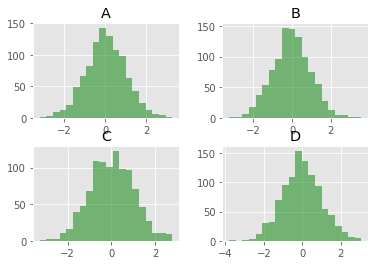

In [25]:
plt.figure()
df.diff().hist(color='g', alpha=0.5, bins=20)
# 注：df中四栏（4列）分别绘制一阶差分的图（绿色，半透明，分20区段），
# 有种2x2子图的感觉

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11797fac8>,
      dtype=object)

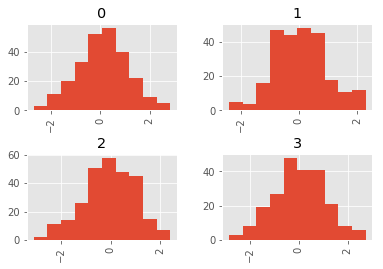

In [26]:
data = pd.Series(np.random.randn(1000))
data.hist(by=np.random.randint(0, 4, 1000),figsize=(6, 4))
# 注：这里产生1000个正态分布的随机数，然后使用hist方法中的by参数随机产生0-3中的整数（即0、1、2、3）
# 将原来的1000个正态分布的随机数对应上分组绘制四张图
# 图的长宽大小为6x4